[kaggle] weight-height 데이터 시각화 및 선형 회귀 예측 실습


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns  # 시각화 라이브러리
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
import os
from google.colab import drive

In [3]:
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks")

Mounted at /content/drive


In [4]:
# read weight-height dataset
data = "weight-height.csv"
df_weight_height = pd.read_csv(data)

In [5]:
data

'weight-height.csv'

In [6]:
df_weight_height

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [7]:
df_weight_height.head()
df_weight_height.shape
df_weight_height.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
## [문제 해결] height : inch와 weight : lb(파운드)로 되어 있음. 
## 컬럼의 모든 값을 다음의 단위로 환산하여 대입해 보세요. -->apply 함수를 이용
## 미국기준 단위를 우리에게 익숙한 값으로 변경 : inch -> 2.54 cm, lb(파운드) -> 0.4563 kg
df_weight_height["Height"] = df_weight_height["Height"].apply(lambda x: x * 2.54)
df_weight_height["Weight"] = df_weight_height["Weight"].apply(lambda x:x * 0.4563)

In [9]:
df_weight_height.head()
df_weight_height.shape
df_weight_height.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.665235
std,9.772721,14.651081
min,137.828359,29.522668
25%,161.304276,61.973777
50%,168.447898,73.561459
75%,175.702625,85.405454
max,200.656806,123.196299


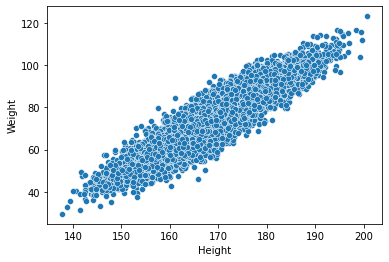

In [10]:
# 입력데이터와 정답데이터를 분리
X =  df_weight_height["Height"] # 입력데이터
y =  df_weight_height["Weight"] # 정답데이터

# seaborn으로 차트 그려보기

sns.scatterplot(x=X,y=y)
plt.show()

In [11]:
# 머신러닝 학습을 위해 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=30)

In [12]:
def reshapes(x):
    return x.values.reshape(-1,1)

In [13]:
# 선형회귀(Linear Regression) 모델 선언하기
model_lr = LinearRegression()

In [14]:
# 선형회귀(Linear Regression) 모델 학습하기
# reshape 부분을 유의! 2차원 이상으로 넣어야함.

model_lr.fit(reshapes(X_train), y_train)

LinearRegression()

테스트시 reshape(-1,1)로 차원을 바꿔 주는 이유

-[키, 성별, bmi]

-학습기는 기본적으로 feature 2개 이상의 input이 들어간다고 가정하고 만들어뒀다.(2차원 array)

-현재 키(height)만 있음.

In [15]:
# 테스트 데이터에 대한 예측을 수행
# 예측을 위해서도 X_test 데이터를 2차원으로 바꿔서 넣어야 함.
y_pred = model_lr.predict(reshapes(X_test))

In [16]:
y_pred

array([56.99441219, 89.49681391, 82.61048275, ..., 85.32345079,
       58.23100321, 80.24679798])

In [17]:
#print(type(X_test))
print(X_test.values)
print(X_test.values.reshape(-1,1))

[156.54859666 179.97665343 175.01291693 ... 176.96845148 157.43994385
 173.30914927]
[[156.54859666]
 [179.97665343]
 [175.01291693]
 ...
 [176.96845148]
 [157.43994385]
 [173.30914927]]


In [18]:
# 내 몸무게 예측해보기
#my_h= pd.Series([160])

my_h = pd.Series([160])
my_w_pred = model_lr.predict(reshapes(my_h))
print(my_h)
print(reshapes(my_h))
my_w_pred

0    160
dtype: int64
[[160]]


array([61.78264106])

In [19]:
y_test

8793    58.656808
1122    90.222967
1283    80.051129
9318    51.263287
7765    62.592769
          ...    
7142    61.637533
8826    57.087457
4553    92.646339
5795    53.679339
3797    80.574967
Name: Weight, Length: 2000, dtype: float64

In [20]:
# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 31.422267780191564
RMSE : 5.6055568661990725


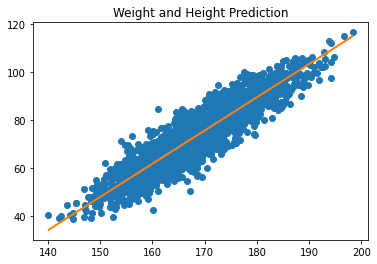

In [21]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_pred)
plt.title('Weight and Height Prediction')
plt.show()